In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

#1

In [169]:
diabetes = sklearn.datasets.load_diabetes()

x=diabetes.data
y=diabetes.target

In [170]:
df_X = pd.DataFrame(x, columns=diabetes.feature_names)
df_y = pd.DataFrame(y, columns=['target'])

In [171]:
df_y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


#2, 3

In [172]:
x=df_X.to_numpy()
y=df_y.to_numpy()

#4

In [173]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#5

In [174]:
df_X.shape

(442, 10)

In [175]:
x.shape[1]

10

In [198]:
W=np.random.rand(10,1)
b=np.random.rand(1)

In [177]:
def model2(x, w, b):
  prediction = 0
  for i in range(x.shape[1]):
    prediction += np.dot(x[:,i],w[i].item())
  prediction += b
  return prediction

In [178]:
def model(x,w,b):
  return np.dot(x,w)+b

In [179]:
pred = model(x_train, W, b)
print(pred.shape)

(353, 1)


#6

In [180]:
def MSE(a, b):
    return ((a.reshape(-1) - b.reshape(-1)) ** 2).mean()

In [181]:
def loss(x,w,b,y):
  prediction = model(x,w,b)
  return MSE(prediction, y)

#7

In [184]:
def gradient(x,w,b,y):
  N=len(y)

  y_pred = model(x,w,b)

  dw=(2/N)*np.dot(x.T,(y_pred.reshape(-1,1)-y))
  #db=2*(y_pred.reshape(-1,1)-y).mean()
  db=(2/N)*np.sum(y_pred-y)
  return dw, db

#8

In [185]:
lr = 0.001

#9

In [199]:
loss_list=[]
epoch=4000000

for i in range(0,epoch):
  dw, db = gradient(x_train, W, b, y_train)

  W -= lr * dw
  b -= lr * db

  loss_list.append(loss(x_train, W, b, y_train))

  if (i+1) % 10000== 0:
    print(f"Epoch {i+1}, {loss_list[i]}")

  if loss_list[i] < 2000 :
    print(f"Epoch {i+1}, {loss_list[i]}")
    break

Epoch 10000, 6416.537753556571
Epoch 20000, 5917.171895006266
Epoch 30000, 5835.875092514306
Epoch 40000, 5764.4663313203155
Epoch 50000, 5695.397136543934
Epoch 60000, 5628.456183498647
Epoch 70000, 5563.569024436483
Epoch 80000, 5500.6661809319985
Epoch 90000, 5439.680642196408
Epoch 100000, 5380.547735534397
Epoch 110000, 5323.205043188375
Epoch 120000, 5267.592322887126
Epoch 130000, 5213.65143121641
Epoch 140000, 5161.326249697958
Epoch 150000, 5110.562613480771
Epoch 160000, 5061.308242552296
Epoch 170000, 5013.5126753803615
Epoch 180000, 4967.1272048998535
Epoch 190000, 4922.104816761198
Epoch 200000, 4878.400129760639
Epoch 210000, 4835.9693383751155
Epoch 220000, 4794.77015732733
Epoch 230000, 4754.761768109113
Epoch 240000, 4715.9047673939185
Epoch 250000, 4678.161117271529
Epoch 260000, 4641.49409724058
Epoch 270000, 4605.86825789669
Epoch 280000, 4571.2493762562435
Epoch 290000, 4537.604412657964
Epoch 300000, 4504.901469186467
Epoch 310000, 4473.109749563954
Epoch 320000, 

#10

In [200]:
prediction = model(x_test,W,b)
mse = loss(x_test,W,b,y_test)
print(f"MSE: {mse}")

MSE: 2864.69176907967


#11

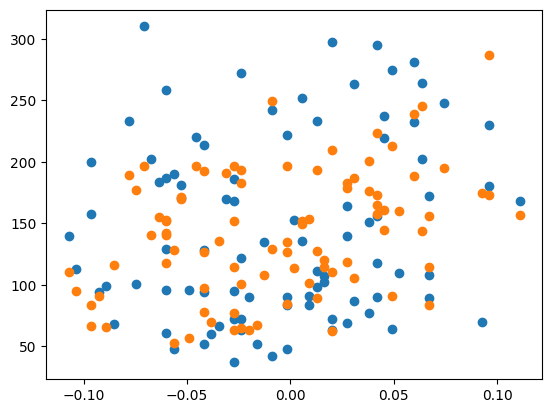

In [202]:
plt.scatter(x_test[:,0], y_test,label='actual')
plt.scatter(x_test[:,0],prediction,label='predicted')
plt.show()

In [122]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [123]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 2900.19
RMSE: 53.85
